In [1]:
import pandas as pd
df = pd.read_csv('C:/project_dataset/regression/chennai_house_price_prediction.csv')
df.head()

,PRT_ID,AREA,INT_SQFT,DIST_MAINROAD,N_BEDROOM,N_BATHROOM,N_ROOM,SALE_COND,PARK_FACIL,BUILDTYPE,UTILITY_AVAIL,STREET,MZZONE,QS_ROOMS,QS_BATHROOM,QS_BEDROOM,QS_OVERALL,COMMIS,SALES_PRICE
0,P03210,Karapakkam,1004,131,1.0,1.0,3,AbNormal,Yes,Commercial,AllPub,Paved,A,4.0,3.9,4.9,4.330,144400,7600000
1,P09411,Anna Nagar,1986,26,2.0,1.0,5,AbNormal,No,Commercial,AllPub,Gravel,RH,4.9,4.2,2.5,3.765,304049,21717770
2,P01812,Adyar,909,70,1.0,1.0,3,AbNormal,Yes,Commercial,ELO,Gravel,RL,4.1,3.8,2.2,3.090,92114,13159200
3,P05346,Velachery,1855,14,3.0,2.0,5,Family,No,Others,NoSewr,Paved,I,4.7,3.9,3.6,4.010,77042,9630290
4,P06210,Karapakkam,1226,84,1.0,1.0,3,AbNormal,Yes,Others,AllPub,Gravel,C,3.0,2.5,4.1,3.290,74063,7406250


In [2]:
df.isnull().sum()

PRT_ID            0
AREA              0
INT_SQFT          0
DIST_MAINROAD     0
N_BEDROOM         1
N_BATHROOM        5
N_ROOM            0
SALE_COND         0
PARK_FACIL        0
BUILDTYPE         0
UTILITY_AVAIL     0
STREET            0
MZZONE            0
QS_ROOMS          0
QS_BATHROOM       0
QS_BEDROOM        0
QS_OVERALL       48
COMMIS            0
SALES_PRICE       0
dtype: int64

In [4]:
import warnings
warnings.filterwarnings('ignore')

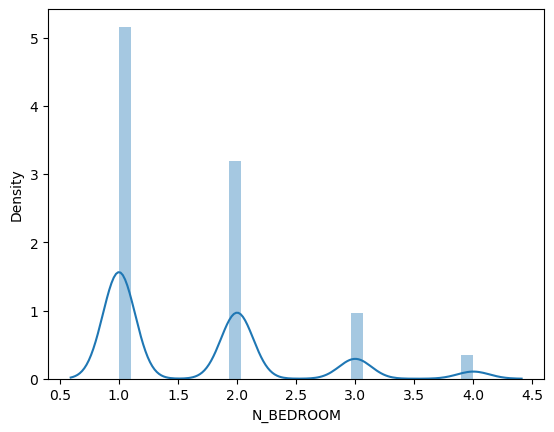

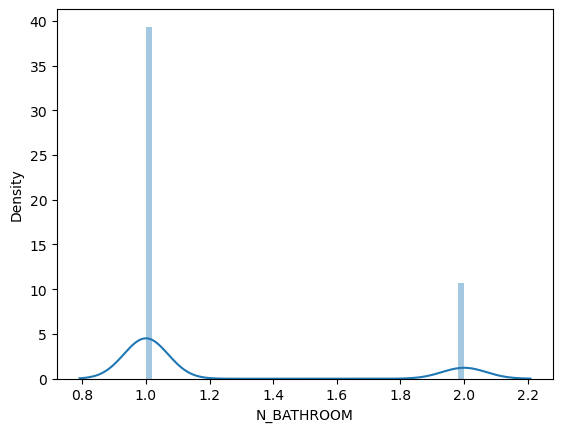

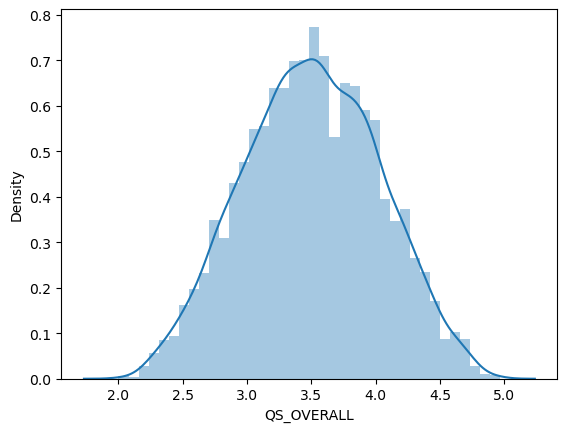

In [5]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
for i in df[['N_BEDROOM','N_BATHROOM','QS_OVERALL']]:
    sns.distplot(df[i])
    plt.show()


In [7]:
print(df['QS_OVERALL'].mean())
print(df['QS_OVERALL'].median())
print()

print(df['N_BEDROOM'].mean())
print(df['N_BEDROOM'].median())
print()

print(df['N_BATHROOM'].mean())
print(df['N_BATHROOM'].mean())
print()

3.5032537884152384
3.5

1.6370287000562747
1.0

1.213260135135135
1.213260135135135



In [8]:
#handling the null values 
#traditional 

df['QS_OVERALL'].fillna(df['QS_OVERALL'].mean(),inplace=True)

In [9]:
#It can be only done when our all columns should be whether a mean(normal distribution) or median(skewness) or mode(categorical columns) 

for i in df[['N_BATHROOM','N_BEDROOM']]:
    df[i].fillna(df[i].mean(),inplace=True)
    
    

In [10]:
df.isnull().sum()

PRT_ID           0
AREA             0
INT_SQFT         0
DIST_MAINROAD    0
N_BEDROOM        0
N_BATHROOM       0
N_ROOM           0
SALE_COND        0
PARK_FACIL       0
BUILDTYPE        0
UTILITY_AVAIL    0
STREET           0
MZZONE           0
QS_ROOMS         0
QS_BATHROOM      0
QS_BEDROOM       0
QS_OVERALL       0
COMMIS           0
SALES_PRICE      0
dtype: int64

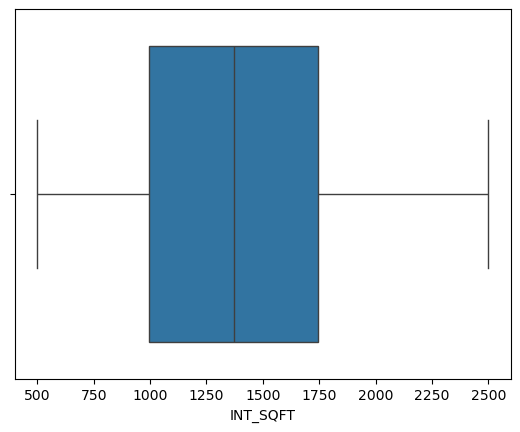

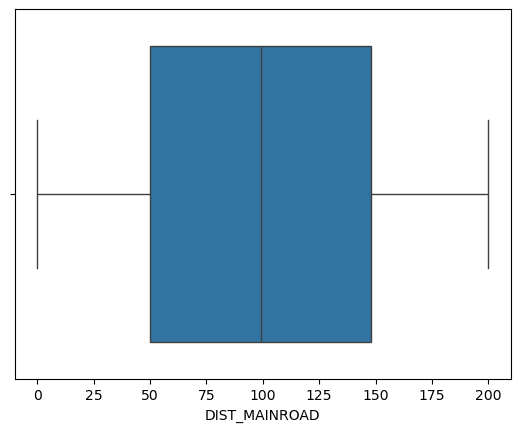

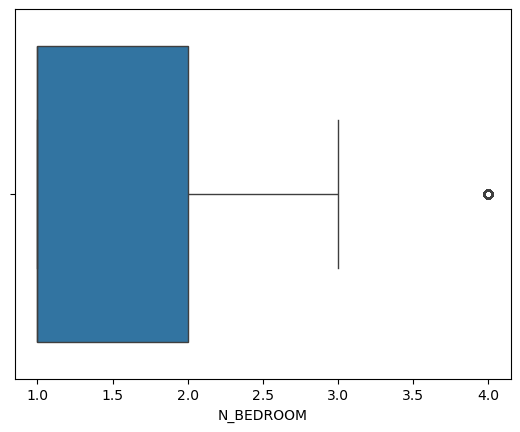

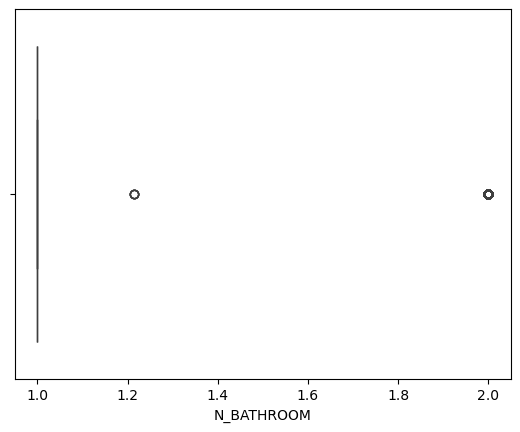

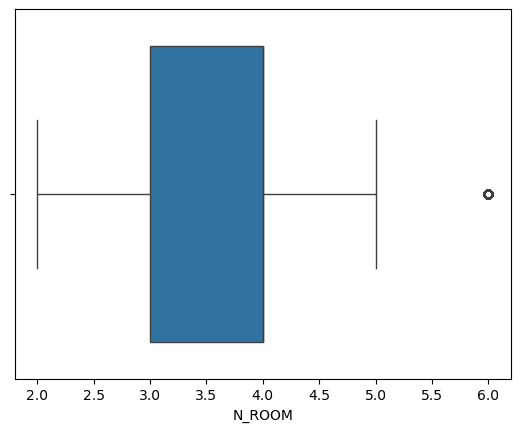

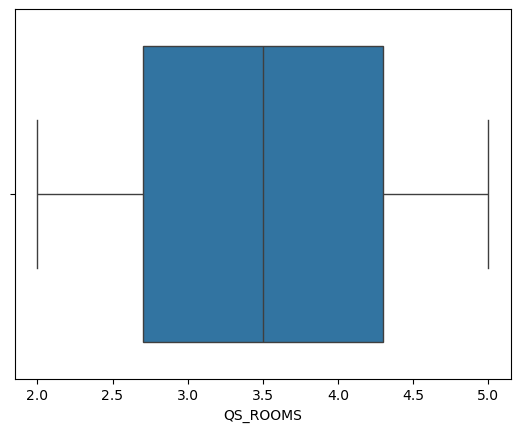

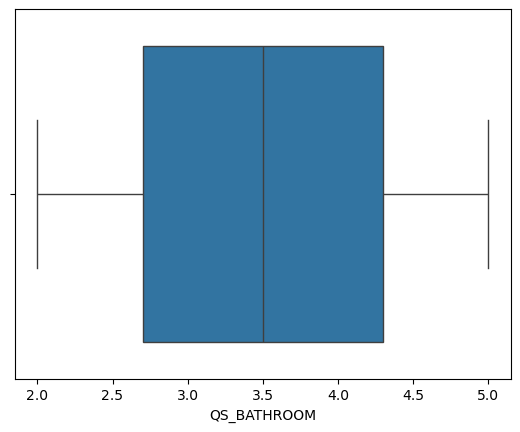

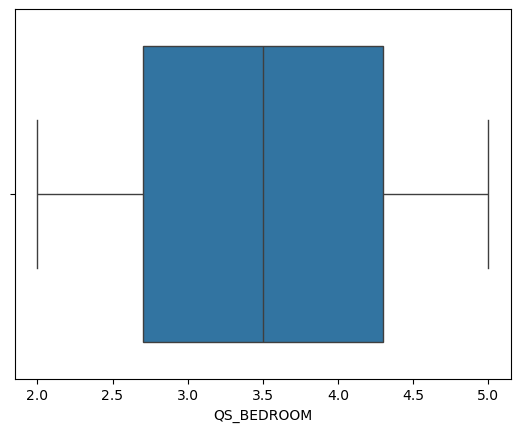

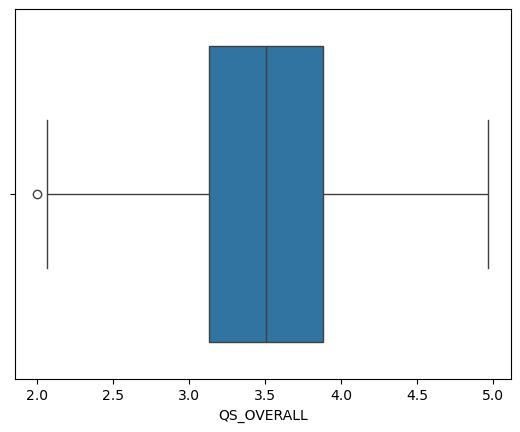

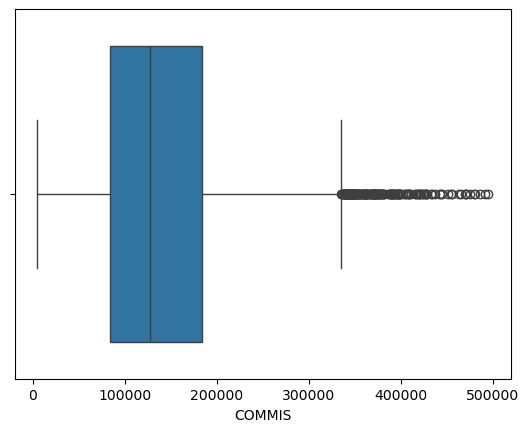

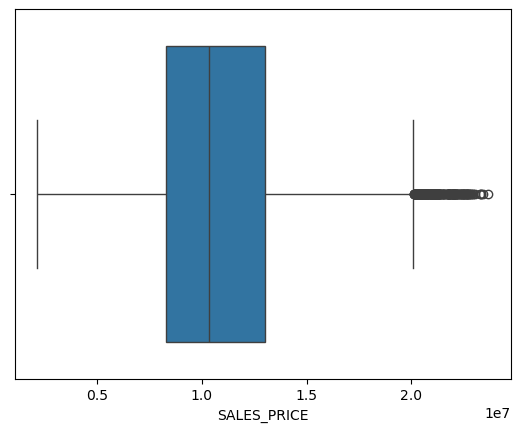

In [11]:
#checking the outliers in the dataset 

for i in df.select_dtypes(include='number').columns:
    sns.boxplot(x=i,data=df)
    plt.show()


In [12]:
#checking the correlation for the numerical columns 
num_cols=df.select_dtypes(include='number')
    

In [13]:
num_cols.head()

,INT_SQFT,DIST_MAINROAD,N_BEDROOM,N_BATHROOM,N_ROOM,QS_ROOMS,QS_BATHROOM,QS_BEDROOM,QS_OVERALL,COMMIS,SALES_PRICE
0,1004,131,1.0,1.0,3,4.0,3.9,4.9,4.330,144400,7600000
1,1986,26,2.0,1.0,5,4.9,4.2,2.5,3.765,304049,21717770
2,909,70,1.0,1.0,3,4.1,3.8,2.2,3.090,92114,13159200
3,1855,14,3.0,2.0,5,4.7,3.9,3.6,4.010,77042,9630290
4,1226,84,1.0,1.0,3,3.0,2.5,4.1,3.290,74063,7406250


In [14]:
num_cols.corr()

,INT_SQFT,DIST_MAINROAD,N_BEDROOM,N_BATHROOM,N_ROOM,QS_ROOMS,QS_BATHROOM,QS_BEDROOM,QS_OVERALL,COMMIS,SALES_PRICE
INT_SQFT,1.000000,0.002022,0.786340,0.515261,0.951279,0.019850,-0.008337,0.008865,0.013989,0.571076,0.612125
DIST_MAINROAD,0.002022,1.000000,-0.002565,0.001969,0.002301,0.002237,-0.029468,0.001554,-0.017255,0.010994,0.018783
N_BEDROOM,0.786340,-0.002565,1.000000,0.755055,0.840280,0.015109,-0.007635,0.015566,0.014172,0.430418,0.330999
N_BATHROOM,0.515261,0.001969,0.755055,1.000000,0.568564,0.013108,-0.012055,0.013190,0.007877,0.256453,0.108865
N_ROOM,0.951279,0.002301,0.840280,0.568564,1.000000,0.016524,-0.007545,0.015072,0.015418,0.533343,0.602760
QS_ROOMS,0.019850,0.002237,0.015109,0.013108,0.016524,1.000000,0.008828,0.007789,0.516147,0.009377,0.021967
QS_BATHROOM,-0.008337,-0.029468,-0.007635,-0.012055,-0.007545,0.008828,1.000000,-0.011745,0.549056,-0.000471,-0.011377
QS_BEDROOM,0.008865,0.001554,0.015566,0.013190,0.015072,0.007789,-0.011745,1.000000,0.628168,0.020118,0.018804
QS_OVERALL,0.013989,-0.017255,0.014172,0.007877,0.015418,0.516147,0.549056,0.628168,1.000000,0.016946,0.020485
COMMIS,0.571076,0.010994,0.430418,0.256453,0.533343,0.009377,-0.000471,0.020118,0.016946,1.000000,0.626275


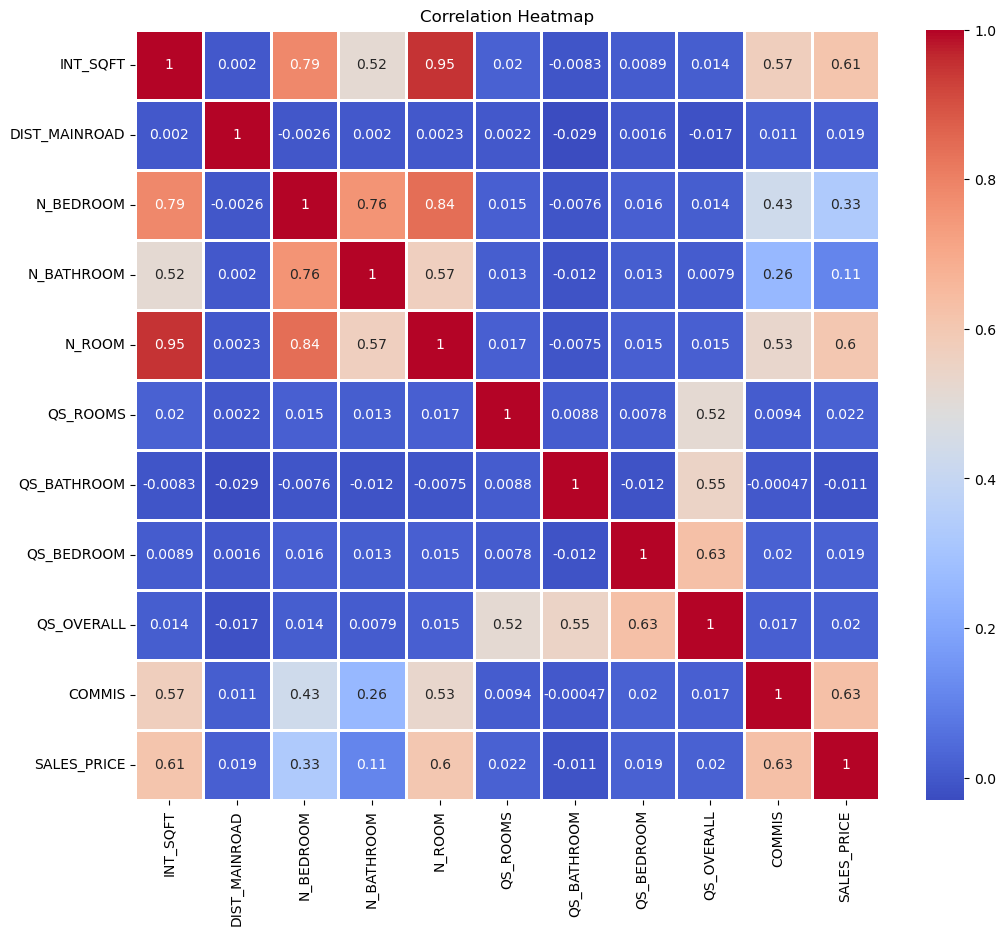

In [15]:
plt.figure(figsize=(12, 10))
sns.heatmap(num_cols.corr(), annot=True, cmap='coolwarm', linewidths=0.9)

plt.title("Correlation Heatmap")
plt.show()

In [17]:
correlation = num_cols.corr()['SALES_PRICE'].sort_values(ascending=False)
print(correlation)


SALES_PRICE      1.000000
COMMIS           0.626275
INT_SQFT         0.612125
N_ROOM           0.602760
N_BEDROOM        0.330999
N_BATHROOM       0.108865
QS_ROOMS         0.021967
QS_OVERALL       0.020485
QS_BEDROOM       0.018804
DIST_MAINROAD    0.018783
QS_BATHROOM     -0.011377
Name: SALES_PRICE, dtype: float64


In [18]:
df=df.drop(['QS_ROOMS', 'QS_BATHROOM', 'QS_BEDROOM', 'QS_OVERALL', 'DIST_MAINROAD'],axis=1)

In [19]:
df.head()

,PRT_ID,AREA,INT_SQFT,N_BEDROOM,N_BATHROOM,N_ROOM,SALE_COND,PARK_FACIL,BUILDTYPE,UTILITY_AVAIL,STREET,MZZONE,COMMIS,SALES_PRICE
0,P03210,Karapakkam,1004,1.0,1.0,3,AbNormal,Yes,Commercial,AllPub,Paved,A,144400,7600000
1,P09411,Anna Nagar,1986,2.0,1.0,5,AbNormal,No,Commercial,AllPub,Gravel,RH,304049,21717770
2,P01812,Adyar,909,1.0,1.0,3,AbNormal,Yes,Commercial,ELO,Gravel,RL,92114,13159200
3,P05346,Velachery,1855,3.0,2.0,5,Family,No,Others,NoSewr,Paved,I,77042,9630290
4,P06210,Karapakkam,1226,1.0,1.0,3,AbNormal,Yes,Others,AllPub,Gravel,C,74063,7406250


In [20]:
#encoding 

df['SALE_COND'].unique()
df['SALE_COND'].value_counts()

SALE_COND
AdjLand        1433
Partial        1429
Normal Sale    1423
AbNormal       1406
Family         1403
Adj Land          6
Ab Normal         5
Partiall          3
PartiaLl          1
Name: count, dtype: int64

In [21]:
df['SALE_COND'].replace({'Ab Normal':'AbNormal','Partiall':'Partial','PartiaLl':'Partial','Adj Land':'AdjLand'},inplace=True)

In [22]:
df['SALE_COND'].value_counts()

SALE_COND
AdjLand        1439
Partial        1433
Normal Sale    1423
AbNormal       1411
Family         1403
Name: count, dtype: int64

In [23]:
df['BUILDTYPE'].value_counts()

BUILDTYPE
House         2444
Commercial    2325
Others        2310
Other           26
Comercial        4
Name: count, dtype: int64

In [24]:
df['BUILDTYPE'].replace({'Other':'Others','Comercial':'Commercial'},inplace=True)

In [25]:
df['BUILDTYPE'].value_counts()

BUILDTYPE
House         2444
Others        2336
Commercial    2329
Name: count, dtype: int64

In [26]:
df['UTILITY_AVAIL'].value_counts()

UTILITY_AVAIL
AllPub     1886
NoSeWa     1871
NoSewr     1829
ELO        1522
All Pub       1
Name: count, dtype: int64

In [27]:
df['UTILITY_AVAIL'].replace({'All Pub':'AllPub'},inplace=True)

In [28]:
df['UTILITY_AVAIL'].value_counts()

UTILITY_AVAIL
AllPub     1887
NoSeWa     1871
NoSewr     1829
ELO        1522
Name: count, dtype: int64

In [29]:
df.head()

,PRT_ID,AREA,INT_SQFT,N_BEDROOM,N_BATHROOM,N_ROOM,SALE_COND,PARK_FACIL,BUILDTYPE,UTILITY_AVAIL,STREET,MZZONE,COMMIS,SALES_PRICE
0,P03210,Karapakkam,1004,1.0,1.0,3,AbNormal,Yes,Commercial,AllPub,Paved,A,144400,7600000
1,P09411,Anna Nagar,1986,2.0,1.0,5,AbNormal,No,Commercial,AllPub,Gravel,RH,304049,21717770
2,P01812,Adyar,909,1.0,1.0,3,AbNormal,Yes,Commercial,ELO,Gravel,RL,92114,13159200
3,P05346,Velachery,1855,3.0,2.0,5,Family,No,Others,NoSewr,Paved,I,77042,9630290
4,P06210,Karapakkam,1226,1.0,1.0,3,AbNormal,Yes,Others,AllPub,Gravel,C,74063,7406250


In [30]:
from scipy.stats import f_oneway

for col in ['AREA', 'SALE_COND', 'PARK_FACIL', 'BUILDTYPE', 'UTILITY_AVAIL', 'STREET', 'MZZONE']:
    
    groups = [df[df[col] == val]['SALES_PRICE'] for val in df[col].unique()]
    print(f"{col}: p = {f_oneway(*groups).pvalue:.4f}")


AREA: p = 0.0000
SALE_COND: p = 0.0003
PARK_FACIL: p = 0.0000
BUILDTYPE: p = 0.0000
UTILITY_AVAIL: p = 0.0000
STREET: p = 0.0000
MZZONE: p = 0.0000


In [32]:
df.head()

,PRT_ID,AREA,INT_SQFT,N_BEDROOM,N_BATHROOM,N_ROOM,SALE_COND,PARK_FACIL,BUILDTYPE,UTILITY_AVAIL,STREET,MZZONE,COMMIS,SALES_PRICE
0,P03210,Karapakkam,1004,1.0,1.0,3,AbNormal,Yes,Commercial,AllPub,Paved,A,144400,7600000
1,P09411,Anna Nagar,1986,2.0,1.0,5,AbNormal,No,Commercial,AllPub,Gravel,RH,304049,21717770
2,P01812,Adyar,909,1.0,1.0,3,AbNormal,Yes,Commercial,ELO,Gravel,RL,92114,13159200
3,P05346,Velachery,1855,3.0,2.0,5,Family,No,Others,NoSewr,Paved,I,77042,9630290
4,P06210,Karapakkam,1226,1.0,1.0,3,AbNormal,Yes,Others,AllPub,Gravel,C,74063,7406250


In [33]:
cat_cols=df.select_dtypes(include='object')

In [34]:
cat_cols.head()

,PRT_ID,AREA,SALE_COND,PARK_FACIL,BUILDTYPE,UTILITY_AVAIL,STREET,MZZONE
0,P03210,Karapakkam,AbNormal,Yes,Commercial,AllPub,Paved,A
1,P09411,Anna Nagar,AbNormal,No,Commercial,AllPub,Gravel,RH
2,P01812,Adyar,AbNormal,Yes,Commercial,ELO,Gravel,RL
3,P05346,Velachery,Family,No,Others,NoSewr,Paved,I
4,P06210,Karapakkam,AbNormal,Yes,Others,AllPub,Gravel,C


In [35]:
#encoded with label encoding 

from sklearn.preprocessing import LabelEncoder
for i in df.select_dtypes(include='object'):
    le=LabelEncoder()
    df[i]=le.fit_transform(df[i])
    



In [36]:
df.head()

,PRT_ID,AREA,INT_SQFT,N_BEDROOM,N_BATHROOM,N_ROOM,SALE_COND,PARK_FACIL,BUILDTYPE,UTILITY_AVAIL,STREET,MZZONE,COMMIS,SALES_PRICE
0,2266,12,1004,1.0,1.0,3,0,2,0,0,4,0,144400,7600000
1,6664,4,1986,2.0,1.0,5,0,0,0,0,0,3,304049,21717770
2,1270,0,909,1.0,1.0,3,0,2,0,1,0,4,92114,13159200
3,3755,15,1855,3.0,2.0,5,2,0,2,3,4,2,77042,9630290
4,4393,12,1226,1.0,1.0,3,0,2,2,0,0,1,74063,7406250


In [37]:
#split the  x and y 

X=df.drop(['SALES_PRICE'],axis=1)
y=df[['SALES_PRICE']]



In [38]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.20,random_state=42)

In [40]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
X_train_scaled=sc.fit_transform(X_train)
X_test_scaled=sc.transform(X_test)

In [41]:
X_train_scaled

array([[-1.10535783, -0.36372674, -1.08403926, ...,  1.30769888,
        -0.21147114, -0.60575008],
       [-1.72891918, -0.36372674, -1.14721471, ...,  1.30769888,
        -0.21147114, -1.29331484],
       [-0.75084087,  0.07949459,  0.85915067, ..., -0.98233454,
         0.45370385,  0.161201  ],
       ...,
       [-1.67307062, -1.02855874,  1.02471394, ..., -0.40982619,
         0.45370385,  1.20819956],
       [ 1.20580139, -1.02855874,  0.50841796, ..., -0.98233454,
         1.11887884,  0.88994773],
       [ 0.26705989,  0.7443266 , -1.43477197, ...,  1.30769888,
        -1.54182112, -1.15655891]])

In [42]:
X_test_scaled

array([[-0.93538395,  0.07949459,  2.08344746, ...,  1.30769888,
        -0.21147114,  1.81256766],
       [-0.84602625,  0.7443266 , -0.08630272, ..., -0.98233454,
        -0.87664613,  0.40209785],
       [ 0.39721133,  0.07949459,  1.12492328, ...,  1.30769888,
         1.11887884,  3.19498982],
       ...,
       [-0.99754583,  0.7443266 ,  0.49316871, ..., -0.98233454,
         0.45370385,  1.06191778],
       [-1.21122728,  0.7443266 ,  0.24046688, ..., -0.40982619,
         0.45370385, -0.12858682],
       [ 1.36606248, -0.36372674, -1.10800236, ..., -0.98233454,
         0.45370385, -0.91977521]])

In [44]:
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import r2_score


models={
    "linearregression":LinearRegression(),
    "DecisionTree": DecisionTreeRegressor(),
    "SVR":SVR(),
    "KNN":KNeighborsRegressor(),
    "RandomForest": RandomForestRegressor()  
}

for name, model in models.items():
    model.fit(X_train_scaled, y_train)
    
    y_pred_test = model.predict(X_test_scaled)  # <-- Make sure X_test is also scaled
    y_pred_train = model.predict(X_train_scaled)

    testing_accuracy = r2_score(y_test, y_pred_test)
    training_accuracy = r2_score(y_train, y_pred_train)

    print(f"{name} → Training R²: {training_accuracy:.4f}, Testing R²: {testing_accuracy:.4f}")

linearregression → Training R²: 0.8114, Testing R²: 0.8078
DecisionTree → Training R²: 1.0000, Testing R²: 0.9565
SVR → Training R²: -0.0207, Testing R²: -0.0142
KNN → Training R²: 0.9178, Testing R²: 0.8631
RandomForest → Training R²: 0.9974, Testing R²: 0.9813
